In [1]:
import matplotlib.pyplot as plt #matlab plotting packing
import seaborn as sns #fancier plotting package
import pandas as pd #dataframe handler
import numpy as np #math 
import pyabf #pClamp package
from scipy.signal import butter, lfilter


In [2]:
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 6
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.25
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.pad'] = 2

plt.rcParams['ytick.major.width'] = 0.25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.pad'] = 2
plt.rcParams['ytick.major.pad'] = 2

plt.rcParams['axes.labelpad'] = 2

In [3]:
def butter_lowpass(cutoff, fs, order=4):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
def find_stims(abf, chan):
    stim_ons = []
    stim_offs = [] 
    stim_durs = []
    for i in abf.sweepList:
        abf.setSweep(i, channel = chan) 
        pulse = abf.sweepY[abf.sweepY > 5]
        stim_durs.append(len(pulse))
        stim_on = ((abf.sweepY > 4).argmax() if (abf.sweepY > 4).any() else -1)
        stim_offs.append((((abf.sweepY[stim_on:] < 4).argmax() if (abf.sweepY[stim_on:] < 4).any() else -1)+stim_on))
        stim_ons.append(stim_on)
    return stim_ons, stim_offs, stim_durs


In [5]:
def extractTraces(eS, eE, iS, iE): 
    PL_EPSC = [] #create empty list
    PL_EPSC_max = [] #create empty list 
    for i in np.arange(eS,eE): #for sweep in this range, 
        new.setSweep(i, channel = 0) #import sweep 
        PL_EPSC.append(butter_lowpass_filter((new.sweepY[on405[0]-1000:off405[0]+1000]-np.mean(new.sweepY[5500:6500])), 100, 5000)) #add chunk of that sweep to empty list 
        PL_EPSC_max.append(np.min(new.sweepY[on405[0]:off405[0]+300]-np.mean(new.sweepY[5500:6500])))  #add the peak value of that sweep to other empty list 
   
    V1_EPSC = [] 
    V1_EPSC_max = [] 
    for i in np.arange(eS,eE):
        new.setSweep(i, channel = 0)
        V1_EPSC.append(butter_lowpass_filter((new.sweepY[on590[0]-1000:off590[0]+1000]-np.mean(new.sweepY[81000:82000])), 100, 5000))
        V1_EPSC_max.append(np.min(new.sweepY[on590[0]:off590[0]+300]-np.mean(new.sweepY[81000:82000])))
    
    return PL_EPSC, V1_EPSC

In [6]:
path = ('../data/Fig3/CIN_A1.abf') #set path to project data folder

new = pyabf.ABF(path) # import pClamp file 

on405, off405, dur405 = find_stims(new, chan = 1) #find on time, off time, and duration of each 405 pulse 
on590, off590, dur590 = find_stims(new, chan = 2) #find on time, off time, and duration of each 590 pulse 

In [7]:
PL_EPSC, V1_EPSC = extractTraces(0,8,0,8)

mPLe = pd.DataFrame(PL_EPSC).melt()
mV1e = pd.DataFrame(V1_EPSC).melt()

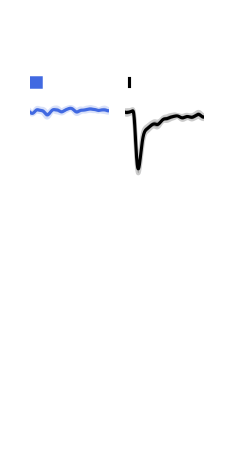

In [8]:
fig, ax = plt.subplots(1,2, figsize = (0.75,1.75), sharey = True, sharex = True, dpi = 300)

sns.lineplot(ax = ax[0], data = mV1e, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'RoyalBlue', lw = 0.75)
sns.lineplot(ax = ax[1], data = mPLe, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'k', lw =0.75)


plt.xlim(980,1400)
plt.ylim(-400,100)

ax[0].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

ax[1].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

sns.despine(ax = ax[0], top = True, bottom = True, left = True, right = True)
sns.despine(ax = ax[1], top = True, bottom = True, left = True, right = True)
#x1, y1 = [1200, 1200], [-250, -150]
#x2, y2 = [1200, 1250], [-250, -250]
#plt.plot(x1, y1, x2, y2, color = 'k', lw = 1)

#plt.text(1065, -250, '100 pA', fontsize = 6, rotation = 90)
#plt.text(1150, -280, '50 ms', fontsize = 6)
x3, y3 = [1000, 1010], [35, 35]
ax[0].plot(x3, y3, color = 'royalblue', lw = 3)
x1, y1 = [1000, 1000], [30, 40]
ax[1].plot(x1, y1, color = 'k', lw = 0.75)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[1].set_xlabel(None)

plt.savefig('../figOutputs/Fig3_A1_CIN_trace.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

In [9]:
path = ('../data/Fig3/CIN_V1.abf') #set path to project data folder

new = pyabf.ABF(path) # import pClamp file 

on405, off405, dur405 = find_stims(new, chan = 1) #find on time, off time, and duration of each 405 pulse 
on590, off590, dur590 = find_stims(new, chan = 2) #find on time, off time, and duration of each 590 pulse 

In [10]:
PL_EPSC, V1_EPSC,  = extractTraces(5,9,10,18)

mPLe = pd.DataFrame(PL_EPSC).melt()
mV1e = pd.DataFrame(V1_EPSC).melt()

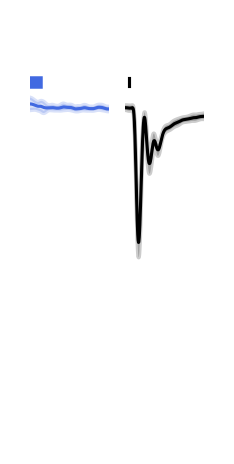

In [11]:
fig, ax = plt.subplots(1,2, figsize = (0.75,1.75), sharey = True, sharex = True, dpi = 300)

sns.lineplot(ax = ax[0], data = mV1e, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'RoyalBlue', lw = 0.75)
sns.lineplot(ax = ax[1], data = mPLe, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'k', lw =0.75)


plt.xlim(980,1400)
plt.ylim(-400,100)

ax[0].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

ax[1].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

sns.despine(ax = ax[0], top = True, bottom = True, left = True, right = True)
sns.despine(ax = ax[1], top = True, bottom = True, left = True, right = True)
#x1, y1 = [1200, 1200], [-250, -150]
#x2, y2 = [1200, 1250], [-250, -250]
#plt.plot(x1, y1, x2, y2, color = 'k', lw = 1)

#plt.text(1065, -250, '100 pA', fontsize = 6, rotation = 90)
#plt.text(1150, -280, '50 ms', fontsize = 6)
x3, y3 = [1000, 1010], [35, 35]
ax[0].plot(x3, y3, color = 'royalblue', lw = 3)
x1, y1 = [1000, 1000], [30, 40]
ax[1].plot(x1, y1, color = 'k', lw = 0.75)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[1].set_xlabel(None)

plt.savefig('../figOutputs/Fig3_V1_CIN_trace.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

In [12]:
path = ('../data/Fig3/CIN_S1.abf') #set path to project data folder

new = pyabf.ABF(path) # import pClamp file 

on405, off405, dur405 = find_stims(new, chan = 1) #find on time, off time, and duration of each 405 pulse 
on590, off590, dur590 = find_stims(new, chan = 2) #find on time, off time, and duration of each 590 pulse 

In [13]:
PL_EPSC, V1_EPSC, = extractTraces(0,15,17,30)

mPLe = pd.DataFrame(PL_EPSC).melt()
mV1e = pd.DataFrame(V1_EPSC).melt()

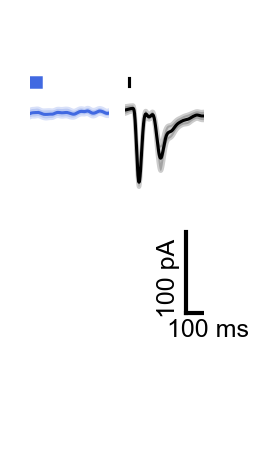

In [14]:
fig, ax = plt.subplots(1,2, figsize = (0.75,1.75), sharey = True, sharex = True, dpi = 300)

sns.lineplot(ax = ax[0], data = mV1e, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'RoyalBlue', lw = 0.75)
sns.lineplot(ax = ax[1], data = mPLe, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'k', lw =0.75)


plt.xlim(980,1400)
plt.ylim(-400,100)

ax[0].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

ax[1].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

sns.despine(ax = ax[0], top = True, bottom = True, left = True, right = True)
sns.despine(ax = ax[1], top = True, bottom = True, left = True, right = True)
x1, y1 = [1300, 1300], [-250, -150]
x2, y2 = [1300, 1400], [-250, -250]
plt.plot(x1, y1, x2, y2, color = 'k', lw = 1)

plt.text(1150, -250, '100 pA', fontsize = 6, rotation = 90)
plt.text(1200, -280, '100 ms', fontsize = 6)
x3, y3 = [1000, 1010], [35, 35]
ax[0].plot(x3, y3, color = 'royalblue', lw = 3)
x1, y1 = [1000, 1000], [30, 40]
ax[1].plot(x1, y1, color = 'k', lw = 0.75)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[1].set_xlabel(None)

plt.savefig('../figOutputs/Fig3_S1_CIN_trace.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

In [15]:
path = ('../data/Fig3/MSN_V1.abf') #set path to project data folder

new = pyabf.ABF(path) # import pClamp file 

on405, off405, dur405 = find_stims(new, chan = 1) #find on time, off time, and duration of each 405 pulse 
on590, off590, dur590 = find_stims(new, chan = 2) #find on time, off time, and duration of each 590 pulse 

In [16]:
PL_EPSC, V1_EPSC,= extractTraces(0,10,12,21)

mPLe = pd.DataFrame(PL_EPSC).melt()
mV1e = pd.DataFrame(V1_EPSC).melt()

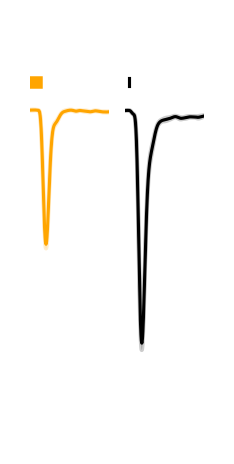

In [17]:
fig, ax = plt.subplots(1,2, figsize = (0.75,1.75), sharey = True, sharex = True, dpi = 300)

sns.lineplot(ax = ax[0], data = mV1e, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'orange', lw = 0.75)
sns.lineplot(ax = ax[1], data = mPLe, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'k', lw =0.75)


plt.xlim(980,1400)
plt.ylim(-400,100)

ax[0].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

ax[1].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

sns.despine(ax = ax[0], top = True, bottom = True, left = True, right = True)
sns.despine(ax = ax[1], top = True, bottom = True, left = True, right = True)
#x1, y1 = [1200, 1200], [-250, -150]
#x2, y2 = [1200, 1250], [-250, -250]
#plt.plot(x1, y1, x2, y2, color = 'k', lw = 1)

#plt.text(1065, -250, '100 pA', fontsize = 6, rotation = 90)
#plt.text(1150, -280, '50 ms', fontsize = 6)
x3, y3 = [1000, 1010], [35, 35]
ax[0].plot(x3, y3, color = 'orange', lw = 3)
x1, y1 = [1000, 1000], [30, 40]
ax[1].plot(x1, y1, color = 'k', lw = 0.75)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[1].set_xlabel(None)

plt.savefig('../figOutputs/Fig3_V1_MSN_trace.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

In [18]:
path = ('../data/Fig3/MSN_S1.abf') #set path to project data folder

new = pyabf.ABF(path) # import pClamp file 

on405, off405, dur405 = find_stims(new, chan = 1) #find on time, off time, and duration of each 405 pulse 
on590, off590, dur590 = find_stims(new, chan = 2) #find on time, off time, and duration of each 590 pulse 

In [19]:
PL_EPSC, V1_EPSC = extractTraces(0,15,17,24)

mPLe = pd.DataFrame(PL_EPSC).melt()
mV1e = pd.DataFrame(V1_EPSC).melt()

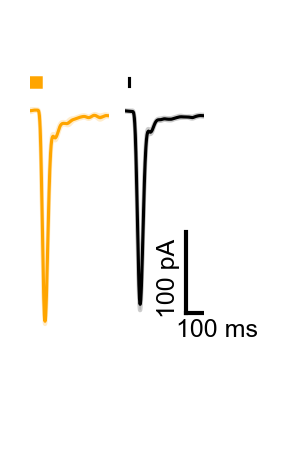

In [20]:
fig, ax = plt.subplots(1,2, figsize = (0.75,1.75), sharey = True, sharex = True, dpi = 300)

sns.lineplot(ax = ax[0], data = mV1e, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'orange', lw = 0.75)
sns.lineplot(ax = ax[1], data = mPLe, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'k', lw =0.75)


plt.xlim(980,1400)
plt.ylim(-400,100)

ax[0].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

ax[1].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

sns.despine(ax = ax[0], top = True, bottom = True, left = True, right = True)
sns.despine(ax = ax[1], top = True, bottom = True, left = True, right = True)
x1, y1 = [1300, 1300], [-250, -150]
x2, y2 = [1300, 1400], [-250, -250]
plt.plot(x1, y1, x2, y2, color = 'k', lw = 1)

plt.text(1150, -250, '100 pA', fontsize = 6, rotation = 90)
plt.text(1250, -280, '100 ms', fontsize = 6)
x3, y3 = [1000, 1010], [35, 35]
ax[0].plot(x3, y3, color = 'orange', lw = 3)
x1, y1 = [1000, 1000], [30, 40]
ax[1].plot(x1, y1, color = 'k', lw = 0.75)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[1].set_xlabel(None)

plt.savefig('../figOutputs/Fig3_S1_MSN_trace.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

In [21]:
path = ('../data/Fig3/MSN_A1.abf') #set path to project data folder

new = pyabf.ABF(path) # import pClamp file 

on405, off405, dur405 = find_stims(new, chan = 1) #find on time, off time, and duration of each 405 pulse 
on590, off590, dur590 = find_stims(new, chan = 2) #find on time, off time, and duration of each 590 pulse 

In [22]:
PL_EPSC, V1_EPSC, = extractTraces(10,19,20,27)

mPLe = pd.DataFrame(PL_EPSC).melt()
mV1e = pd.DataFrame(V1_EPSC).melt()

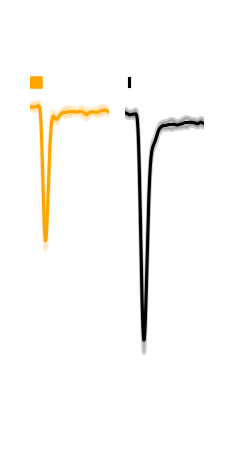

In [23]:
fig, ax = plt.subplots(1,2, figsize = (0.75,1.75), sharey = True, sharex = True, dpi = 300)

sns.lineplot(ax = ax[0], data = mV1e, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'orange', lw = 0.75)
sns.lineplot(ax = ax[1], data = mPLe, x = 'variable', y = 'value', n_boot= 1000, errorbar = ('se'), color = 'k', lw =0.75)


plt.xlim(980,1400)
plt.ylim(-400,100)

ax[0].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

ax[1].tick_params(         
    which='both',      
    bottom=False,   
    left=False,
    top=False,        
    labelleft=False, 
    labelbottom = False)

sns.despine(ax = ax[0], top = True, bottom = True, left = True, right = True)
sns.despine(ax = ax[1], top = True, bottom = True, left = True, right = True)
#x1, y1 = [1200, 1200], [-250, -150]
#x2, y2 = [1200, 1250], [-250, -250]
#plt.plot(x1, y1, x2, y2, color = 'k', lw = 1)

#plt.text(1065, -250, '100 pA', fontsize = 6, rotation = 90)
#plt.text(1150, -280, '50 ms', fontsize = 6)
x3, y3 = [1000, 1010], [35, 35]
ax[0].plot(x3, y3, color = 'orange', lw = 3)
x1, y1 = [1000, 1000], [30, 40]
ax[1].plot(x1, y1, color = 'k', lw = 0.75)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[1].set_xlabel(None)

plt.savefig('../figOutputs/Fig3_A1_MSN_trace.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)